<a href="https://colab.research.google.com/github/bkrfethi/DataScience-estin-Labs/blob/main/Lab2_IBM_HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 IBM HR Analytics: Employee Attrition Analysis
## 🎓 Fundamentals of Data Science - Lab 2

---

### 📝 Project Context
This notebook presents the complete solution for **Lab 2** of the "Fundamentals of Data Science" series. The goal is to analyze a fictional HR dataset created by IBM to understand the factors leading to employee attrition (turnover).

We will explore the data, handle outliers, and visualize correlations between salary, age, and job satisfaction.

### 🎯 Learning Objectives
1.  **Data Exploration:** Understanding the structure using `Pandas` (types, missing values).
2.  **Descriptive Statistics:** Analyzing central tendency and dispersion.
3.  **Visualization:** Creating impactful charts with `Seaborn` and `Plotly` (interactive).
4.  **Outlier Detection:** Using the IQR method to identify anomalies.
5.  **Correlation Analysis:** Identifying relationships between variables.

### 💾 About the Dataset
* **Source:** [IBM HR Analytics Employee Attrition & Performance (Kaggle)](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)
* **Size:** 1470 rows, 35 columns.
* **Target Variable:** `Attrition` (Yes/No).


import kagglehub

# Download latest version
path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")

print("Path to dataset files:", path)

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [ ]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

display(df.head(10))
display(df.tail(5))


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [ ]:
print("Dataset shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nInfo Summary:\n")
df.info()

NameError: name 'df' is not defined

In [ ]:
display(df.describe())

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
display(df.describe(include='object'))


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [ ]:
print("\nMissing values per column:\n", df.isnull().sum())



Missing values per column:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurr

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns
print(f"\nNumber of numerical columns: {len(num_cols)}")
print(f"Number of categorical columns: {len(cat_cols)}")



Number of numerical columns: 26
Number of categorical columns: 9


In [ ]:
#part 2

In [ ]:
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]
print(f"\nMean Age: {mean_age:.2f}, Median Age: {median_age}, Mode Age: {mode_age}")


Mean Age: 36.92, Median Age: 36.0, Mode Age: 35


In [ ]:
summary = pd.DataFrame({
    'Mean': [df['MonthlyIncome'].mean(), df['YearsAtCompany'].mean(), df['TotalWorkingYears'].mean()],
    'Median': [df['MonthlyIncome'].median(), df['YearsAtCompany'].median(), df['TotalWorkingYears'].median()]
}, index=['MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears'])
display(summary)

,Mean,Median
MonthlyIncome,6502.931293,4919.0
YearsAtCompany,7.008163,5.0
TotalWorkingYears,11.279592,10.0


In [ ]:
min_inc = df['MonthlyIncome'].min()
max_inc = df['MonthlyIncome'].max()
range_inc = max_inc - min_inc
std_inc = df['MonthlyIncome'].std()
var_inc = df['MonthlyIncome'].var()
q1 = df['MonthlyIncome'].quantile(0.25)
q2 = df['MonthlyIncome'].quantile(0.5)
q3 = df['MonthlyIncome'].quantile(0.75)
iqr = q3 - q1

print(f"\nIncome Range: {range_inc}")
print(f"Standard Deviation: {std_inc:.2f}")
print(f"Variance: {var_inc:.2f}")
print(f"Q1: {q1}, Q2 (Median): {q2}, Q3: {q3}, IQR: {iqr}")


Income Range: 18990
Standard Deviation: 4707.96
Variance: 22164857.07
Q1: 2911.0, Q2 (Median): 4919.0, Q3: 8379.0, IQR: 5468.0


In [ ]:
dept_stats = df.groupby('Department').agg({
    'MonthlyIncome': 'mean',
    'Age': 'mean',
    'YearsAtCompany': 'mean',
    'EmployeeNumber': 'count'
}).rename(columns={'EmployeeNumber': 'EmployeeCount'}).round(2)
display(dept_stats)


,MonthlyIncome,Age,YearsAtCompany,EmployeeCount
Department,,,,
Human Resources,6654.51,37.81,7.24,63
Research & Development,6281.25,37.04,6.86,961
Sales,6959.17,36.54,7.28,446


In [ ]:
# 5. Comparing Groups - By Attrition
attrition_stats = df.groupby('Attrition').agg({
    'MonthlyIncome': 'mean',
    'Age': 'mean',
    'YearsAtCompany': 'mean',
    'JobSatisfaction': 'mean',
    'WorkLifeBalance': 'mean'
}).round(2)
display(attrition_stats)

,MonthlyIncome,Age,YearsAtCompany,JobSatisfaction,WorkLifeBalance
Attrition,,,,,
No,6832.74,37.56,7.37,2.78,2.78
Yes,4787.09,33.61,5.13,2.47,2.66


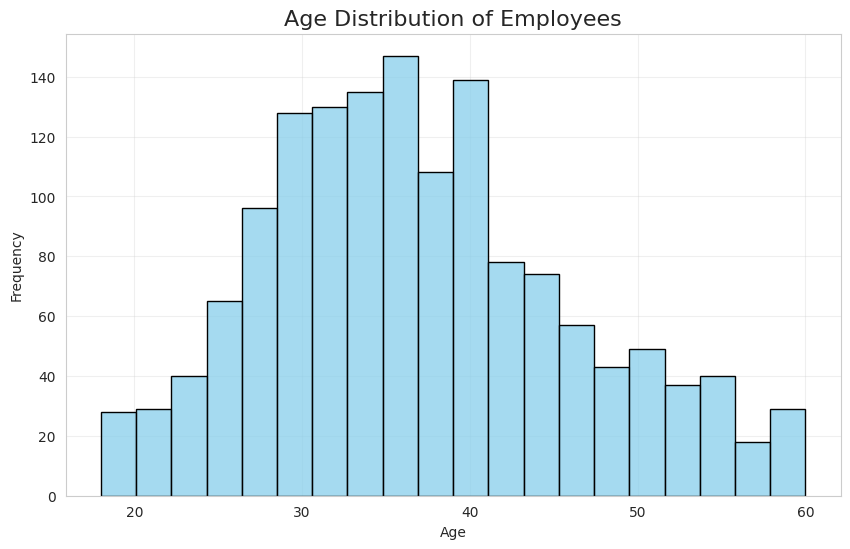

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', bins=20, kde=False, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Employees', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

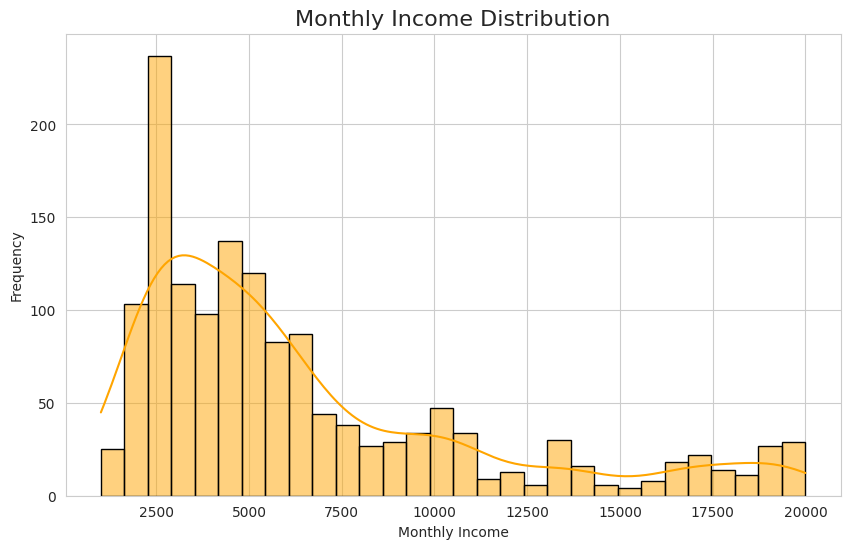

In [ ]:
# 2. Histogram with KDE - Monthly Income
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='MonthlyIncome', bins=30, kde=True, color='orange', edgecolor='black')
plt.title('Monthly Income Distribution', fontsize=16)
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()


/tmp/ipython-input-4223953321.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Department', y='MonthlyIncome', palette='Set2')


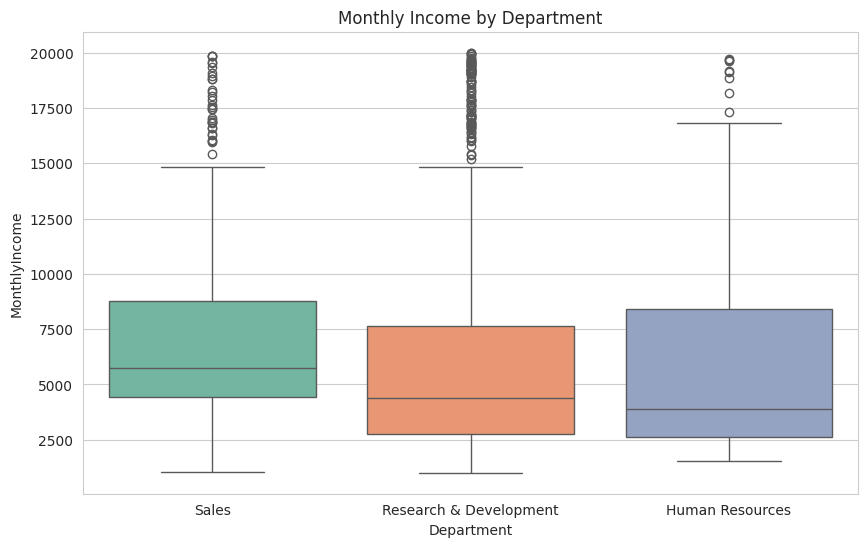

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Department', y='MonthlyIncome', palette='Set2')
plt.title('Monthly Income by Department')
plt.show()

/tmp/ipython-input-2390012072.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='Age', palette='pastel')


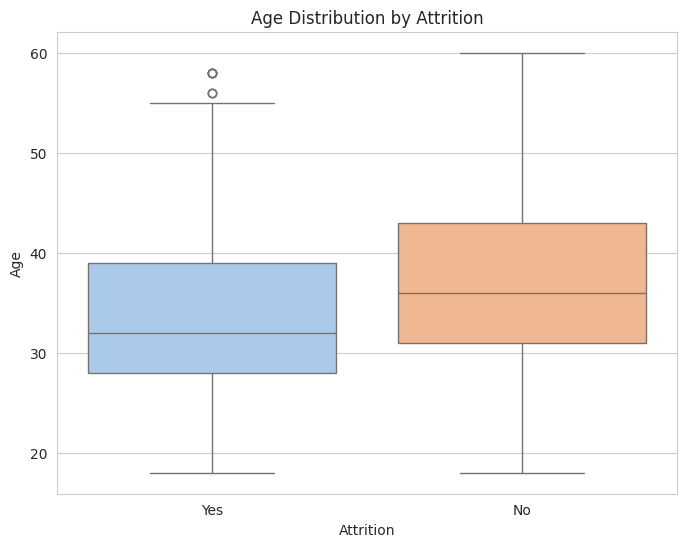

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Attrition', y='Age', palette='pastel')
plt.title('Age Distribution by Attrition')
plt.show()

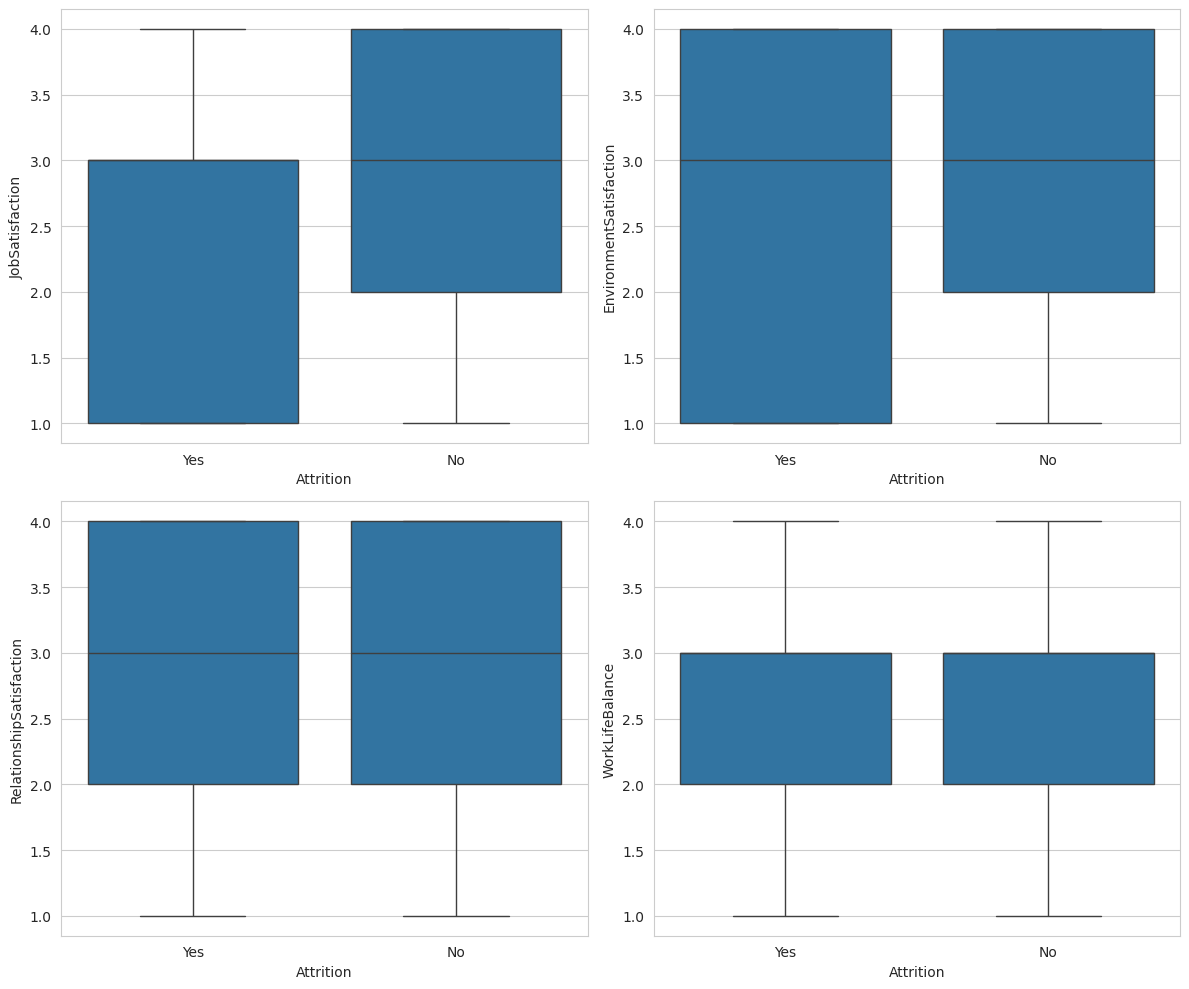

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))
sns.boxplot(data=df, x='Attrition', y='JobSatisfaction', ax=axes[0,0])
sns.boxplot(data=df, x='Attrition', y='EnvironmentSatisfaction', ax=axes[0,1])
sns.boxplot(data=df, x='Attrition', y='RelationshipSatisfaction', ax=axes[1,0])
sns.boxplot(data=df, x='Attrition', y='WorkLifeBalance', ax=axes[1,1])
plt.tight_layout()
plt.show()

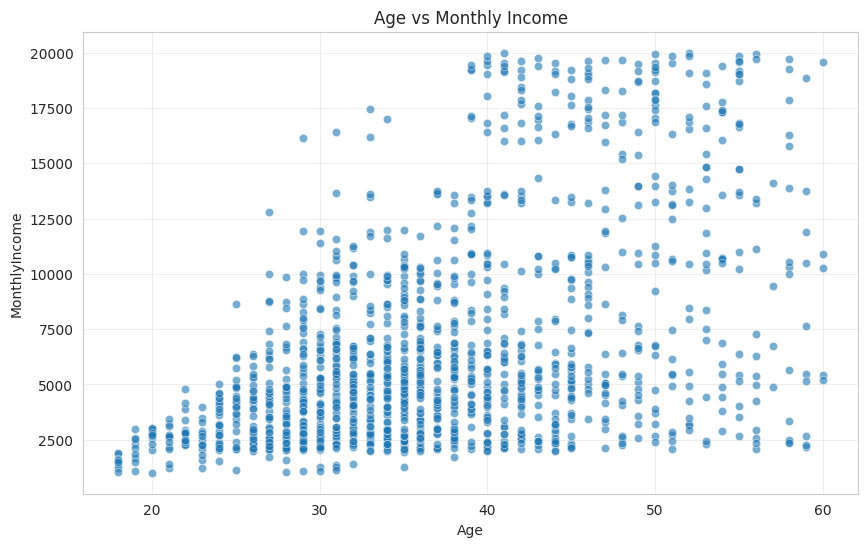

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='MonthlyIncome', alpha=0.6)
plt.title('Age vs Monthly Income')
plt.grid(True, alpha=0.3)
plt.show()

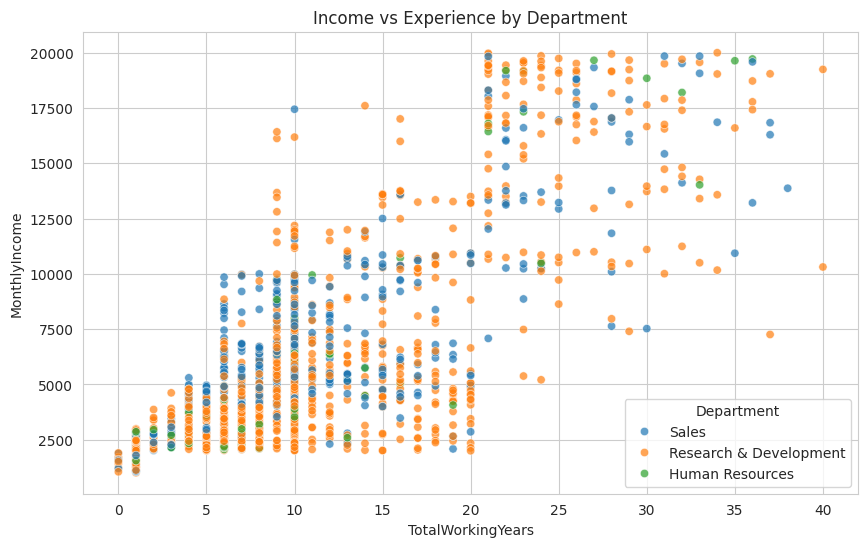

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='TotalWorkingYears', y='MonthlyIncome', hue='Department', alpha=0.7)
plt.title('Income vs Experience by Department')
plt.show()


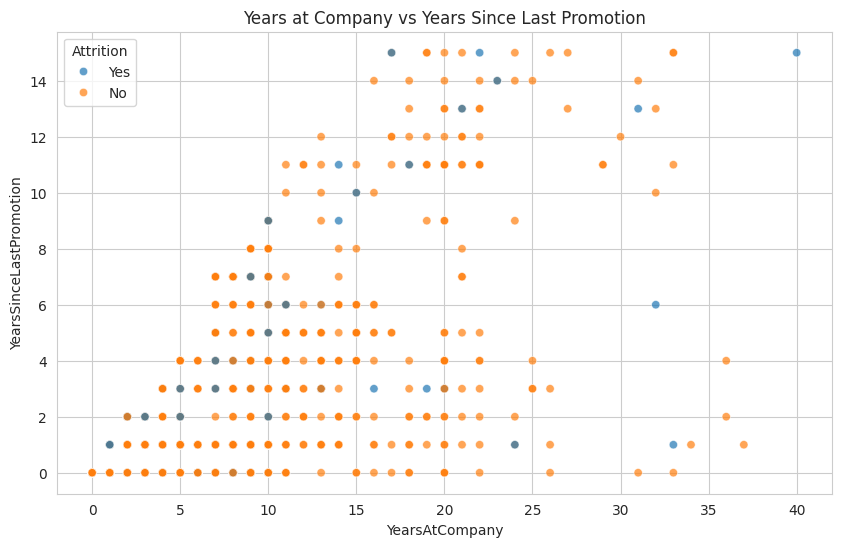

In [ ]:
# 8. Scatterplot - Years at Company vs Last Promotion
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='YearsAtCompany', y='YearsSinceLastPromotion', hue='Attrition', alpha=0.7)
plt.title('Years at Company vs Years Since Last Promotion')
plt.show()

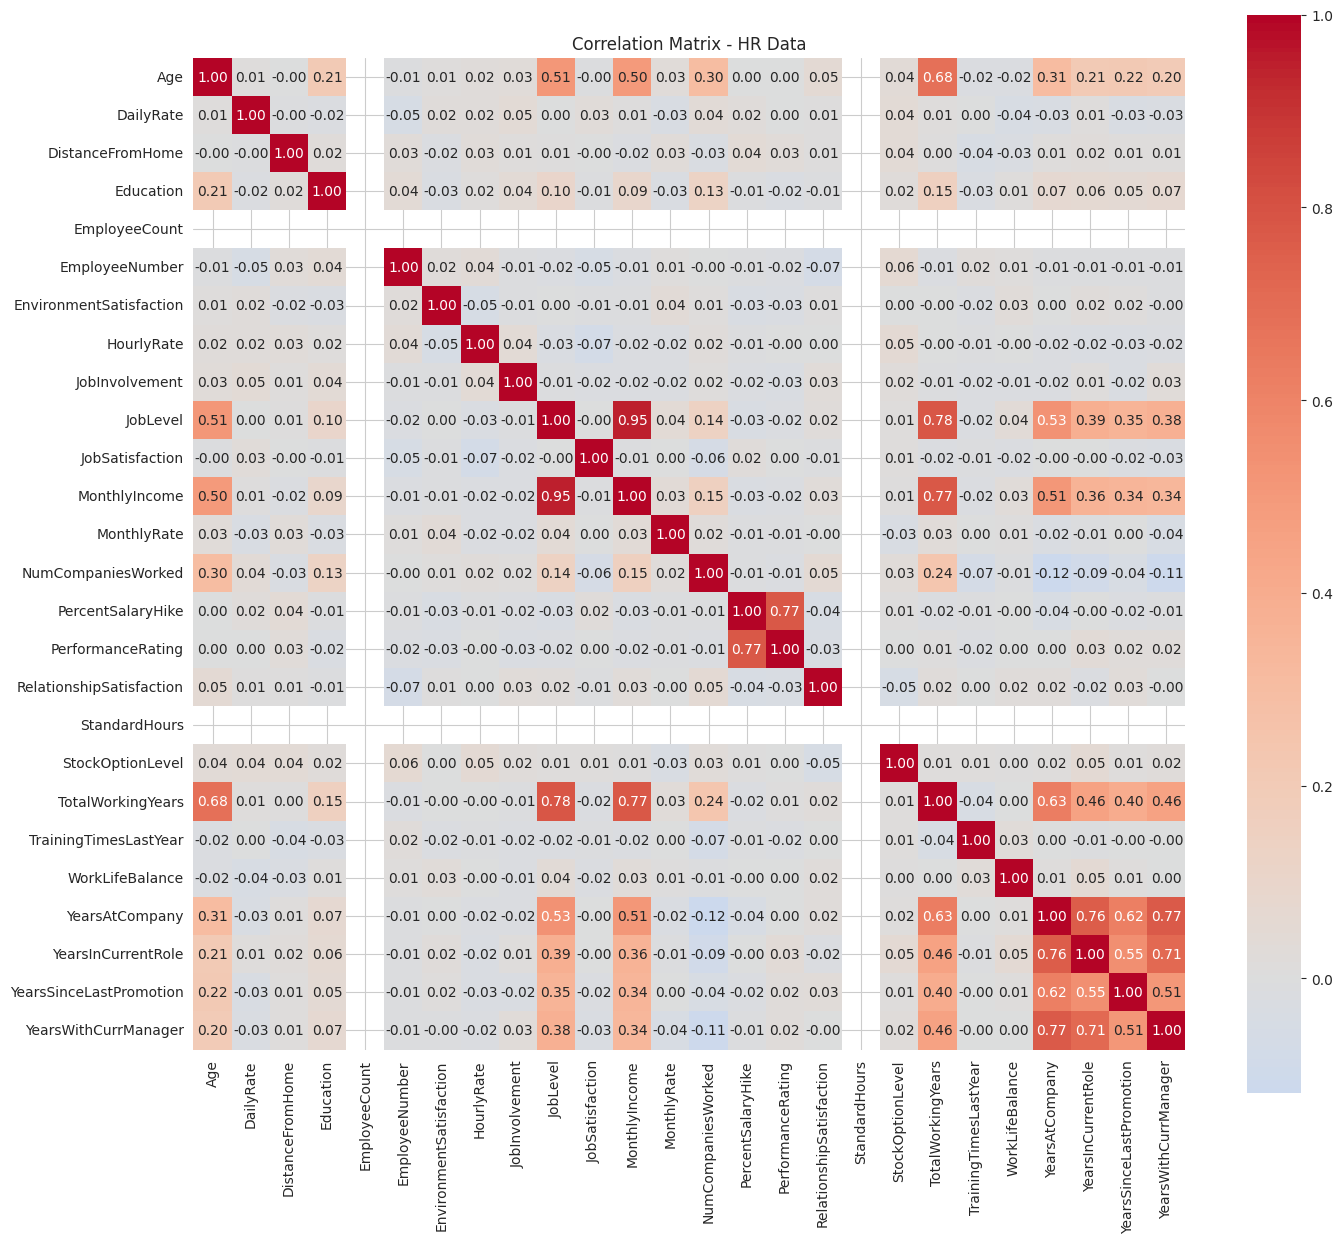

In [ ]:

# 9. Correlation Heatmap
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix - HR Data')
plt.show()

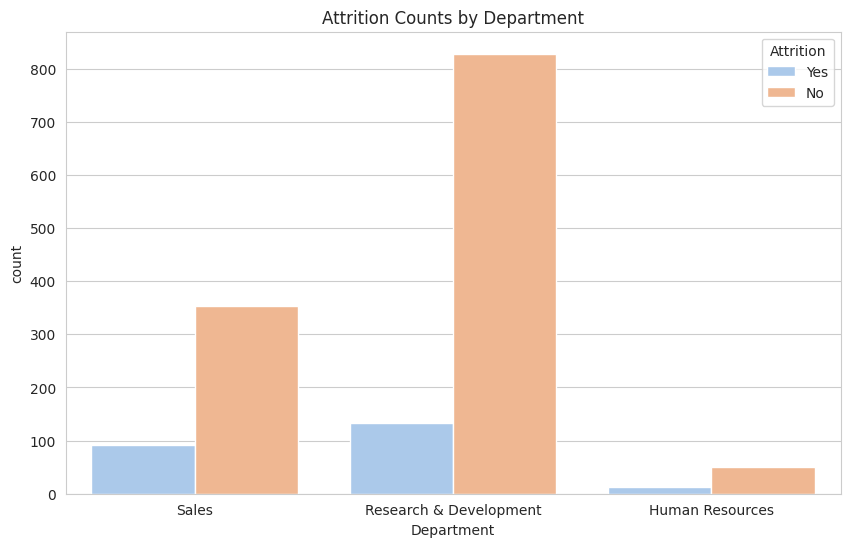

In [ ]:
# 10. Count Plot - Attrition by Department
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Department', hue='Attrition', palette='pastel')
plt.title('Attrition Counts by Department')
plt.show()


part 4


In [ ]:
import scipy.stats as stats
from IPython.display import display

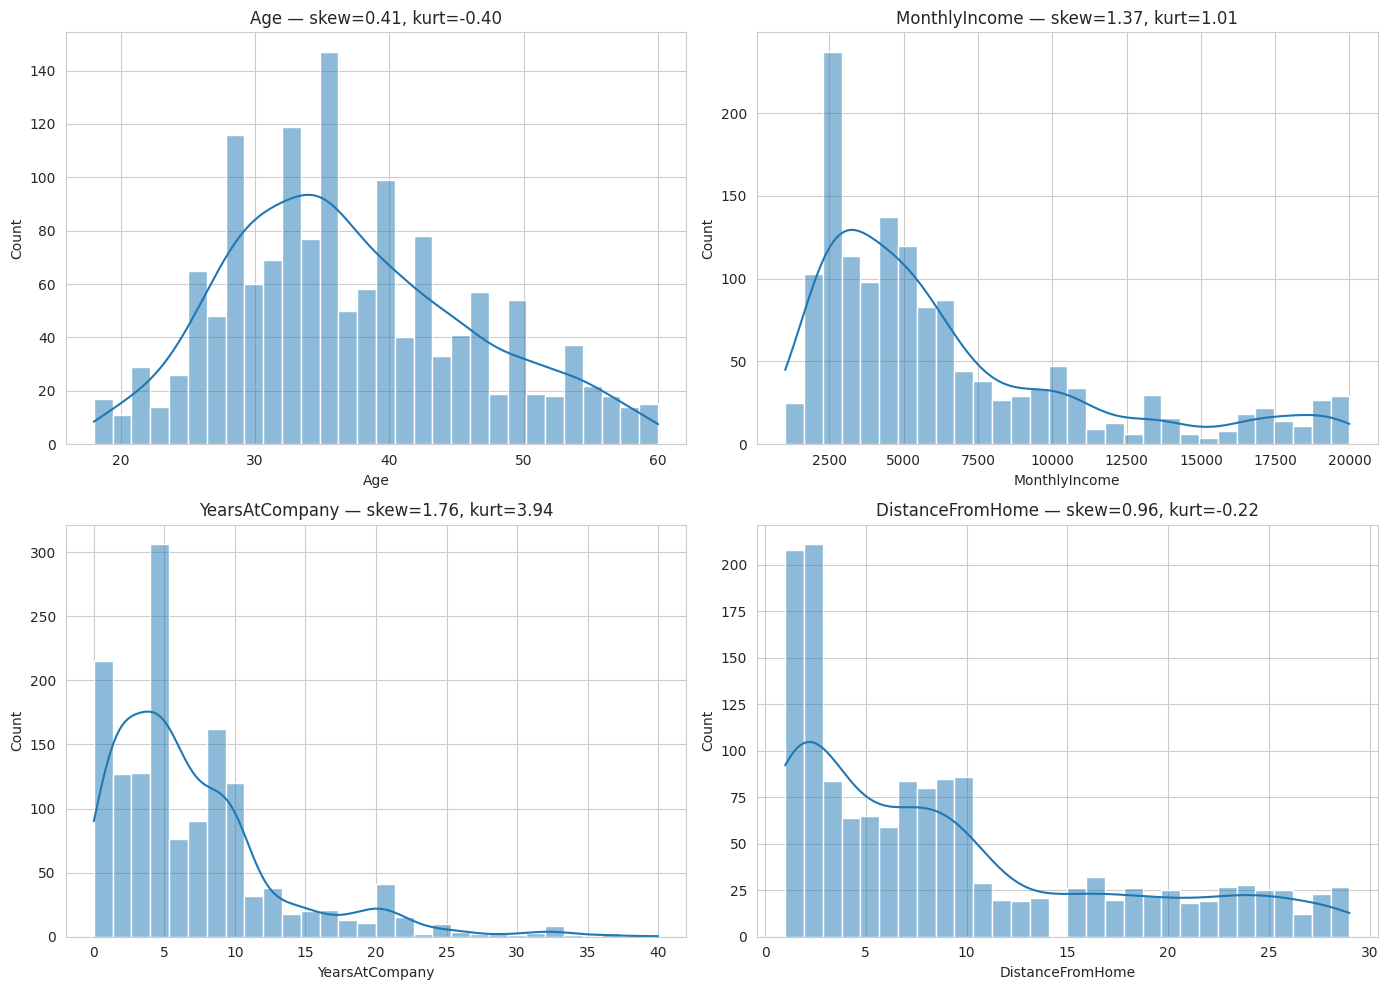

In [ ]:
vars_check = ['Age','MonthlyIncome','YearsAtCompany','DistanceFromHome']
plt.figure(figsize=(14,10))
for i, col in enumerate(vars_check, 1):
    plt.subplot(2,2,i)
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f"{col} — skew={df[col].skew():.2f}, kurt={df[col].kurt():.2f}")
plt.tight_layout()
plt.show()

In [ ]:
for col in vars_check:
    print(f"{col}: mean={df[col].mean():.2f}, median={df[col].median():.2f}, skew={df[col].skew():.2f}")



Age: mean=36.92, median=36.00, skew=0.41
MonthlyIncome: mean=6502.93, median=4919.00, skew=1.37
YearsAtCompany: mean=7.01, median=5.00, skew=1.76
DistanceFromHome: mean=9.19, median=7.00, skew=0.96


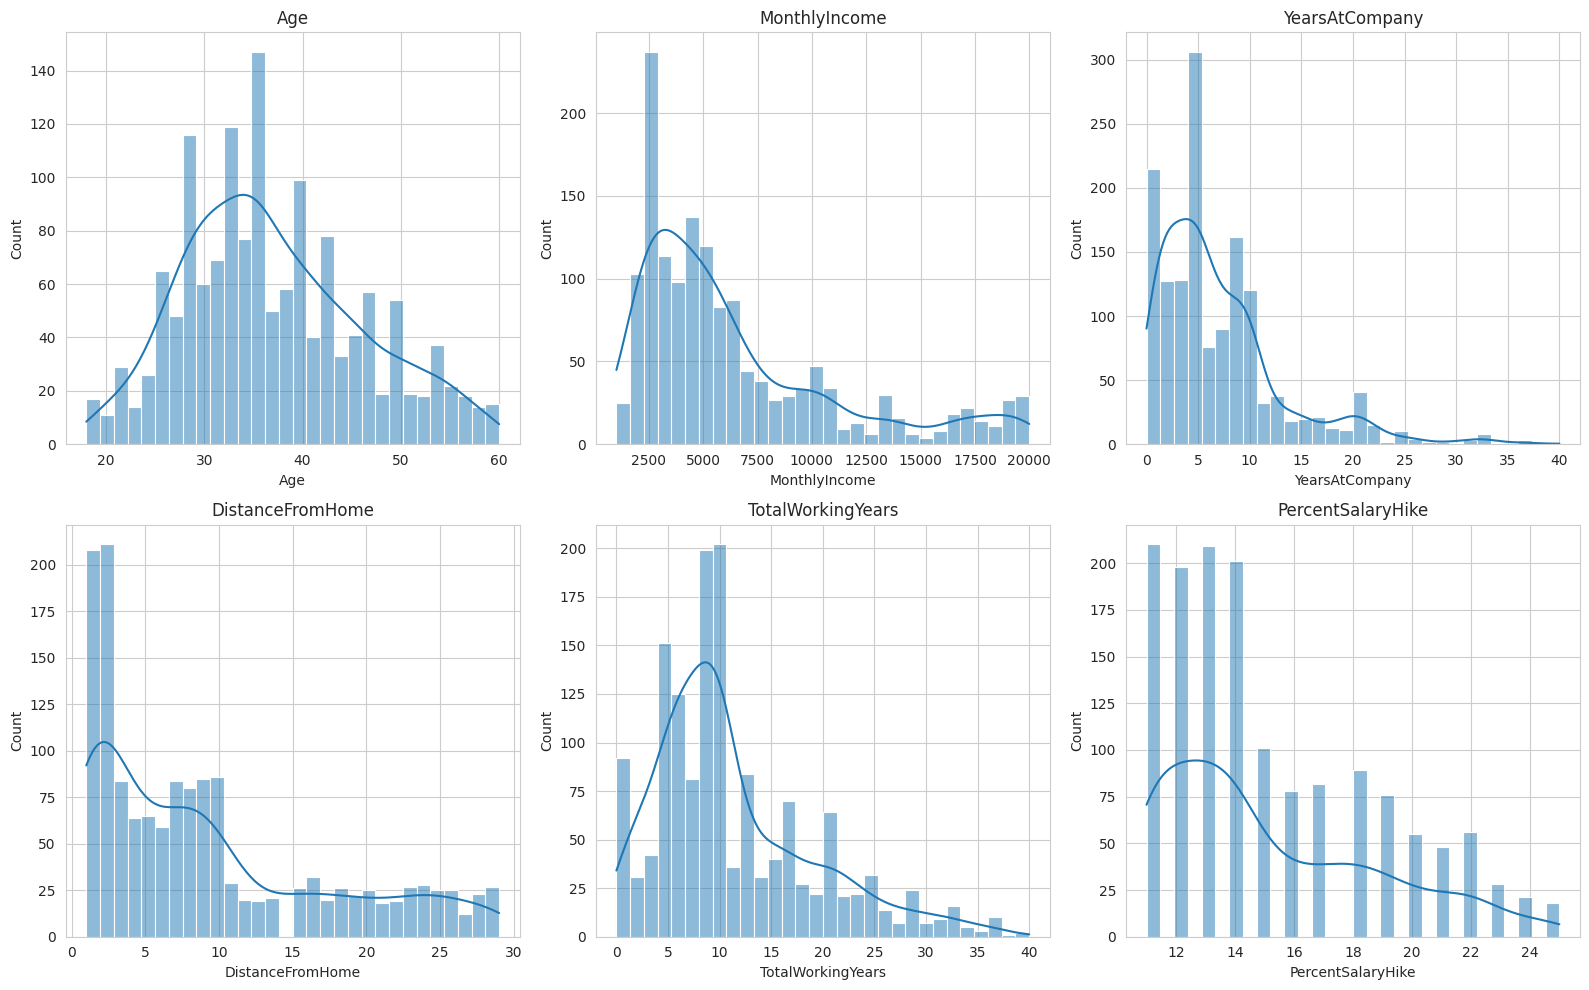

In [ ]:
vars_2x3 = ['Age','MonthlyIncome','YearsAtCompany','DistanceFromHome','TotalWorkingYears','PercentSalaryHike']
plt.figure(figsize=(16,10))
for i,col in enumerate(vars_2x3,1):
    plt.subplot(2,3,i)
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

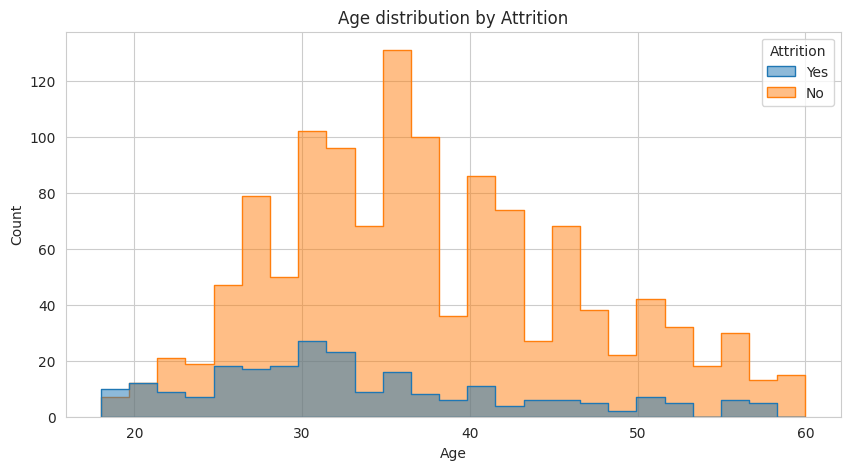

In [ ]:
# Age by Attrition (overlapping)
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Age', hue='Attrition', bins=25, kde=False, element='step', stat='count', common_norm=False, alpha=0.5)
plt.title("Age distribution by Attrition")
plt.show()


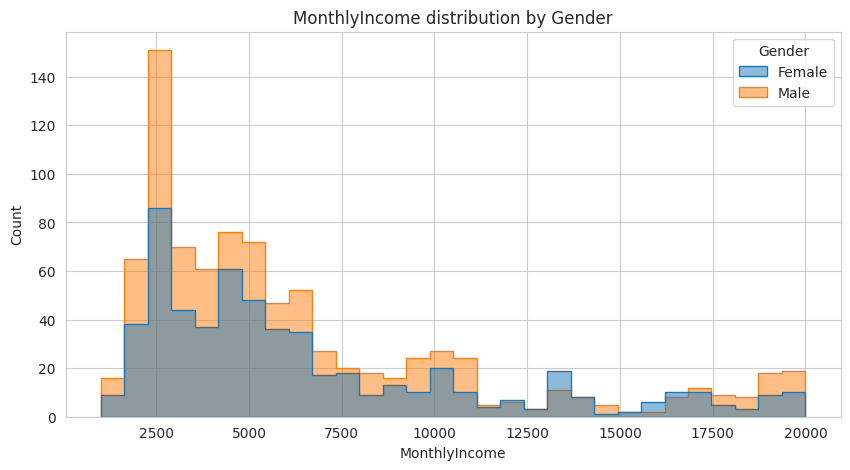

In [ ]:
# MonthlyIncome by Gender
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='MonthlyIncome', hue='Gender', bins=30, kde=False, element='step', stat='count', common_norm=False, alpha=0.5)
plt.title("MonthlyIncome distribution by Gender")
plt.show()




In [ ]:
group_stats = df.groupby(['Attrition']).agg(MedianAge=('Age','median'), MedianIncome=('MonthlyIncome','median'), Count=('EmployeeNumber','count'))
display(group_stats)

gender_stats = df.groupby('Gender').agg(MedianIncome=('MonthlyIncome','median'), MeanIncome=('MonthlyIncome','mean'))
display(gender_stats)


,MedianAge,MedianIncome,Count
Attrition,,,
No,36.0,5204.0,1233
Yes,32.0,3202.0,237


,MedianIncome,MeanIncome
Gender,,
Female,5081.5,6686.566327
Male,4837.5,6380.507937


part 5






In [ ]:
def iqr_outlier_info(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    out = series[(series < lower) | (series > upper)]
    return {'q1':q1,'q3':q3,'iqr':iqr,'lower':lower,'upper':upper,'n_outliers': out.shape[0], 'out_values': out.sort_values(ascending=False)}


In [ ]:
inc_info = iqr_outlier_info(df['MonthlyIncome'])
print("MonthlyIncome IQR:", {k: round(v,2) for k,v in inc_info.items() if k in ['q1','q3','iqr','lower','upper']})
print("Number of MonthlyIncome outliers:", inc_info['n_outliers'])
display(df.loc[(df['MonthlyIncome'] < inc_info['lower']) | (df['MonthlyIncome'] > inc_info['upper']), ['EmployeeNumber','MonthlyIncome','JobRole','Department']].sort_values('MonthlyIncome', ascending=False).head(30))


MonthlyIncome IQR: {'q1': np.float64(2911.0), 'q3': np.float64(8379.0), 'iqr': np.float64(5468.0), 'lower': np.float64(-5291.0), 'upper': np.float64(16581.0)}
Number of MonthlyIncome outliers: 114


,EmployeeNumber,MonthlyIncome,JobRole,Department
190,259,19999,Manager,Research & Development
746,1035,19973,Research Director,Research & Development
851,1191,19943,Manager,Research & Development
165,226,19926,Manager,Research & Development
568,787,19859,Manager,Research & Development
918,1282,19847,Manager,Sales
749,1038,19845,Manager,Sales
1242,1740,19833,Manager,Sales
898,1255,19740,Research Director,Research & Development
956,1338,19717,Manager,Human Resources


In [ ]:
age_info = iqr_outlier_info(df['Age'])
print("\nAge IQR:", {k: round(v,2) for k,v in age_info.items() if k in ['q1','q3','iqr','lower','upper']})
print("Number of Age outliers:", age_info['n_outliers'])
display(df.loc[(df['Age'] < age_info['lower']) | (df['Age'] > age_info['upper']), ['EmployeeNumber','Age','Department']].head(20))



Age IQR: {'q1': np.float64(30.0), 'q3': np.float64(43.0), 'iqr': np.float64(13.0), 'lower': np.float64(10.5), 'upper': np.float64(62.5)}
Number of Age outliers: 0


,EmployeeNumber,Age,Department


In [ ]:
yac_info = iqr_outlier_info(df['YearsAtCompany'])
print("\nYearsAtCompany IQR:", {k: round(v,2) for k,v in yac_info.items() if k in ['q1','q3','iqr','lower','upper']})
print("Number of YearsAtCompany outliers:", yac_info['n_outliers'])
years_out_df = df.loc[(df['YearsAtCompany'] < yac_info['lower']) | (df['YearsAtCompany'] > yac_info['upper']), ['EmployeeNumber','YearsAtCompany','Department','JobRole']].sort_values('YearsAtCompany', ascending=False)
display(years_out_df.head(50))
print("Outlier departments counts:")
display(years_out_df['Department'].value_counts())



YearsAtCompany IQR: {'q1': np.float64(3.0), 'q3': np.float64(9.0), 'iqr': np.float64(6.0), 'lower': np.float64(-6.0), 'upper': np.float64(18.0)}
Number of YearsAtCompany outliers: 104


,EmployeeNumber,YearsAtCompany,Department,JobRole
126,165,40,Research & Development,Healthcare Representative
98,131,37,Sales,Sales Executive
270,374,36,Research & Development,Manager
1116,1578,36,Sales,Manager
561,776,34,Sales,Manager
962,1352,33,Human Resources,Manager
190,259,33,Research & Development,Manager
237,329,33,Sales,Manager
914,1278,33,Research & Development,Healthcare Representative
1111,1572,33,Research & Development,Manufacturing Director


Outlier departments counts:


,count
Department,
Research & Development,66
Sales,31
Human Resources,7


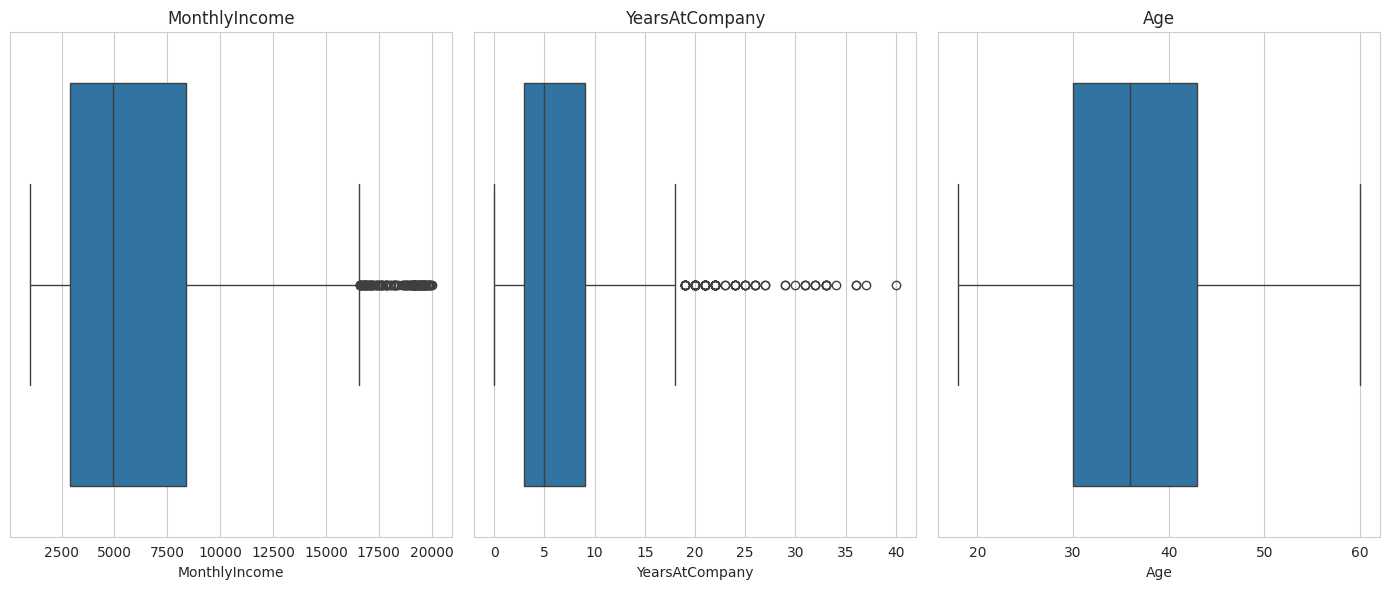

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
sns.boxplot(x=df['MonthlyIncome'])
plt.title('MonthlyIncome')

plt.subplot(1,3,2)
sns.boxplot(x=df['YearsAtCompany'])
plt.title('YearsAtCompany')

plt.subplot(1,3,3)
sns.boxplot(x=df['Age'])
plt.title('Age')
plt.tight_layout()
plt.show()

In [ ]:
num_cols = ['Age','TotalWorkingYears','YearsAtCompany','JobLevel','PerformanceRating','MonthlyIncome']
corrs = df[num_cols].corr()['MonthlyIncome'].drop('MonthlyIncome').sort_values(ascending=False)
print("Correlation with MonthlyIncome (descending):")
display(corrs.round(4))

Correlation with MonthlyIncome (descending):


,MonthlyIncome
JobLevel,0.9503
TotalWorkingYears,0.7729
YearsAtCompany,0.5143
Age,0.4979
PerformanceRating,-0.0171


In [ ]:
df['Attrition_Numeric'] = df['Attrition'].map({'Yes':1,'No':0})
corr_attr = df.select_dtypes(include=np.number).corr()['Attrition_Numeric'].drop('Attrition_Numeric')
corr_attr_sorted = corr_attr.reindex(corr_attr.abs().sort_values(ascending=False).index)
print("Top correlations with Attrition (absolute value, top 10):")
display(corr_attr_sorted.head(10).round(4))


Top correlations with Attrition (absolute value, top 10):


,Attrition_Numeric
TotalWorkingYears,-0.1711
JobLevel,-0.1691
YearsInCurrentRole,-0.1605
MonthlyIncome,-0.1598
Age,-0.1592
YearsWithCurrManager,-0.1562
StockOptionLevel,-0.1371
YearsAtCompany,-0.1344
JobInvolvement,-0.1300
JobSatisfaction,-0.1035


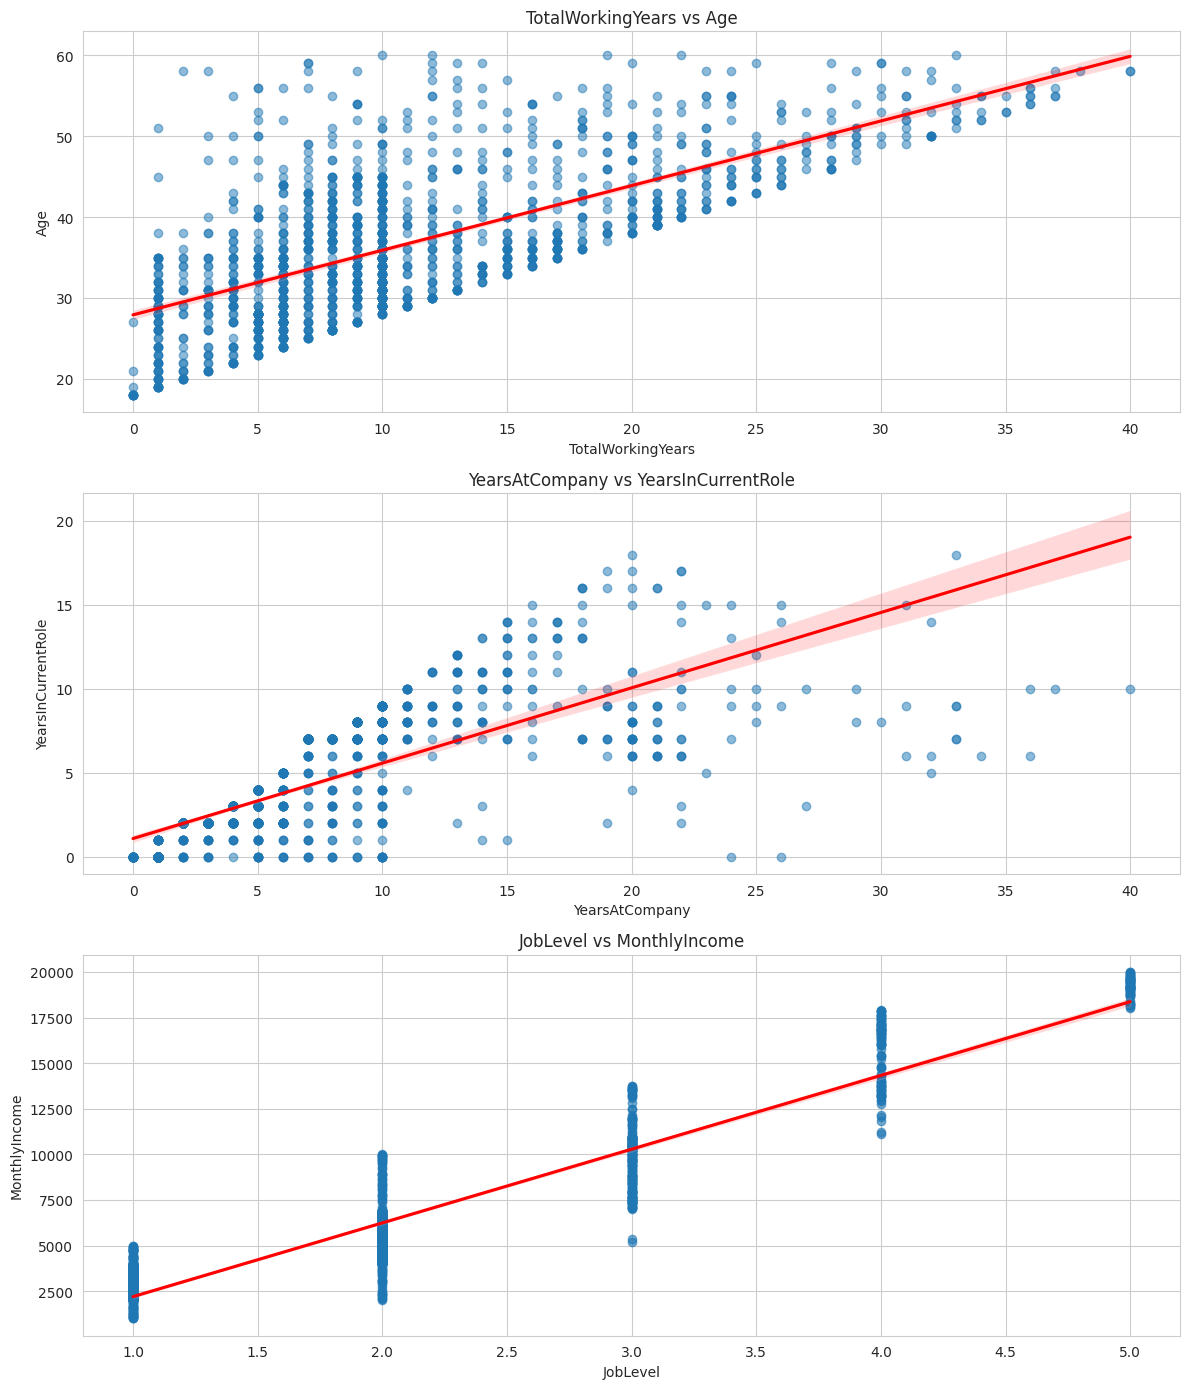

In [ ]:
plt.figure(figsize=(12,14))
plt.subplot(3,1,1)
sns.regplot(data=df, x='TotalWorkingYears', y='Age', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('TotalWorkingYears vs Age')

plt.subplot(3,1,2)
sns.regplot(data=df, x='YearsAtCompany', y='YearsInCurrentRole', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('YearsAtCompany vs YearsInCurrentRole')

plt.subplot(3,1,3)
sns.regplot(data=df, x='JobLevel', y='MonthlyIncome', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('JobLevel vs MonthlyIncome')
plt.tight_layout()
plt.show()

In [ ]:
pairs = [('YearsAtCompany','MonthlyIncome'), ('Age','MonthlyIncome'), ('TotalWorkingYears','MonthlyIncome')]
rows = []
for x,y in pairs:
    pear = df[x].corr(df[y], method='pearson')
    spear = df[x].corr(df[y], method='spearman')
    rows.append({'X':x,'Y':y,'Pearson':round(pear,4),'Spearman':round(spear,4)})
display(pd.DataFrame(rows))


,X,Y,Pearson,Spearman
0,YearsAtCompany,MonthlyIncome,0.5143,0.4643
1,Age,MonthlyIncome,0.4979,0.4719
2,TotalWorkingYears,MonthlyIncome,0.7729,0.7100


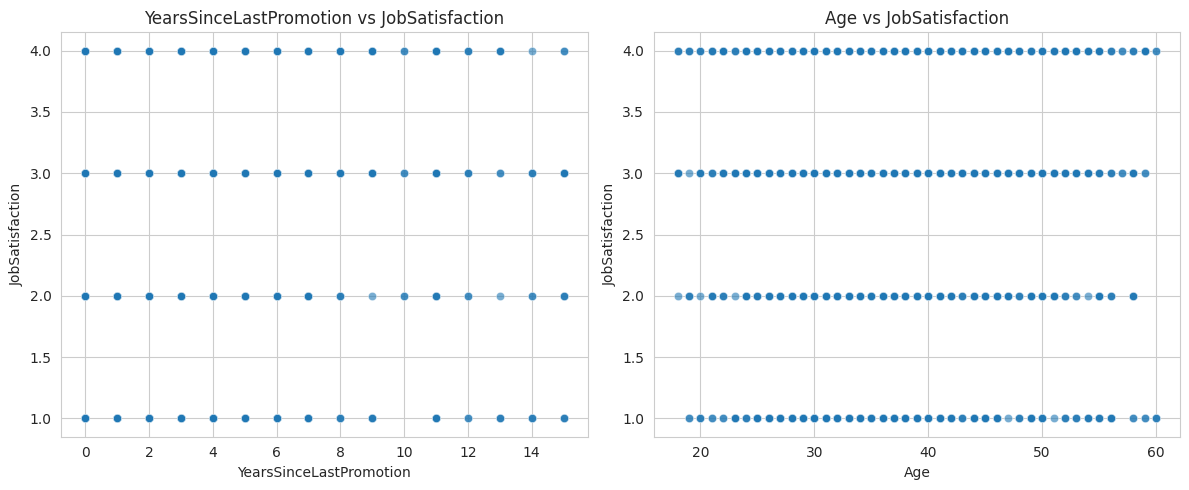

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x='YearsSinceLastPromotion', y='JobSatisfaction', alpha=0.6)
plt.title('YearsSinceLastPromotion vs JobSatisfaction')

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='Age', y='JobSatisfaction', alpha=0.6)
plt.title('Age vs JobSatisfaction')
plt.tight_layout()
plt.show()


In [ ]:
summary = [
    ('TotalWorkingYears','Age','Linear strong', round(df['TotalWorkingYears'].corr(df['Age']),4)),
    ('YearsAtCompany','YearsInCurrentRole','Linear moderate', round(df['YearsAtCompany'].corr(df['YearsInCurrentRole']),4)),
    ('JobLevel','MonthlyIncome','Strong positive (expected)', round(df['JobLevel'].corr(df['MonthlyIncome']),4)),
    ('YearsAtCompany','MonthlyIncome','Weak/monotonic-ish', round(df['YearsAtCompany'].corr(df['MonthlyIncome']),4)),
    ('Age','MonthlyIncome','Weak positive/non-linear', round(df['Age'].corr(df['MonthlyIncome']),4)),
    ('YearsSinceLastPromotion','JobSatisfaction','No clear pattern', round(df['YearsSinceLastPromotion'].corr(df['JobSatisfaction']),4))
]
summary_df = pd.DataFrame(summary, columns=['Variable1','Variable2','RelationshipType','Correlation'])
display(summary_df)

# 5.11 Correlation vs Causation - printed guidance (French)
print("\nNotes sur 'corrélation vs causalité' :")
print("- Une corrélation n'implique pas la causalité. Ex : JobLevel et MonthlyIncome sont corrélés — la promotion (JobLevel) entraîne généralement une hausse du salaire.")
print("- Toujours chercher des variables de confusion (ex: expérience -> JobLevel et Income).")
print("- Pour l'attrition, utiliser des méthodes (modèles, tests) et le contexte métier avant d'inférer une cause.")


,Variable1,Variable2,RelationshipType,Correlation
0,TotalWorkingYears,Age,Linear strong,0.6804
1,YearsAtCompany,YearsInCurrentRole,Linear moderate,0.7588
2,JobLevel,MonthlyIncome,Strong positive (expected),0.9503
3,YearsAtCompany,MonthlyIncome,Weak/monotonic-ish,0.5143
4,Age,MonthlyIncome,Weak positive/non-linear,0.4979
5,YearsSinceLastPromotion,JobSatisfaction,No clear pattern,-0.0182



Notes sur 'corrélation vs causalité' :
- Une corrélation n'implique pas la causalité. Ex : JobLevel et MonthlyIncome sont corrélés — la promotion (JobLevel) entraîne généralement une hausse du salaire.
- Toujours chercher des variables de confusion (ex: expérience -> JobLevel et Income).
- Pour l'attrition, utiliser des méthodes (modèles, tests) et le contexte métier avant d'inférer une cause.


In [ ]:
corr_matrix = df.select_dtypes(include=np.number).corr().abs()
spurious = []
for col in corr_matrix.columns:
    # find pairs with relatively high corr but suspect (heuristic): with ID-like EmployeeNumber
    if col == 'EmployeeNumber':
        top = corr_matrix[col].sort_values(ascending=False).head(5)
        for other, val in top.items():
            if other != 'EmployeeNumber' and val > 0.1:
                spurious.append((col, other, round(val,4)))
spurious_df = pd.DataFrame(spurious, columns=['VarA','VarB','AbsCorr'])
if not spurious_df.empty:
    print("\nExemples possibles de corrélations spurious (EmployeeNumber impliqué):")
    display(spurious_df)
else:
    print("\nAucun cas évident de corrélation spurious automatique détecté avec EmployeeNumber.")

# 5.13 Suggestions finales (affichage)
print("\nRecommandations rapides :")
print("- Pour les outliers : vérifier cas par cas (jobrole, department). Si ce sont cadres, garder; sinon investiguer.")
print("- Pour la modélisation d'attrition : encoder correctement, tester régression/logit, vérifier multicolinéarité (VIF).")
print("- Documenter toute transformation (log pour income si très skewed).")



Aucun cas évident de corrélation spurious automatique détecté avec EmployeeNumber.

Recommandations rapides :
- Pour les outliers : vérifier cas par cas (jobrole, department). Si ce sont cadres, garder; sinon investiguer.
- Pour la modélisation d'attrition : encoder correctement, tester régression/logit, vérifier multicolinéarité (VIF).
- Documenter toute transformation (log pour income si très skewed).
